In [1]:
import sys
sys.path.append('../src')

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import tensorflow as tf

In [3]:
from gait.config import pd
from gait.utils import get_data_by_overlap_percent, split_test_train_by_subjects, remove_invalid_data
from gait.training import train_model
from gait.evalution import save_history, save_test_history, save_accuracy_loss_figure, save_confusion_matrix_figure, compute_validations_predictions

UNIQUE>>>>>>> ['MMuX9YIh4NTbLZLM', 'xYdtS1F8tDyjEIgN', 'psiuhPJmLIa2wC4u', 'PE8D53oX060qLbdX', 'EUbKPOSQgjccjtvi', 'NKdnm6cN3KKAx7R4']
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/devic

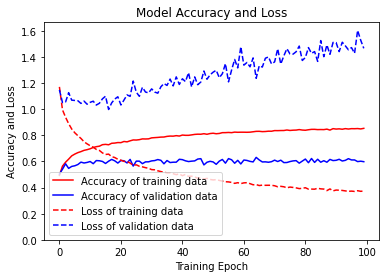

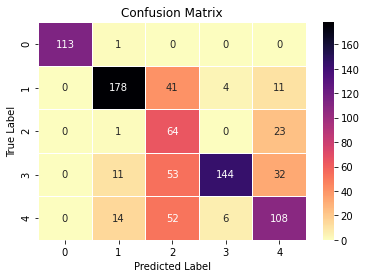

UNIQUE>>>>>>> ['NKdnm6cN3KKAx7R4', 'EUbKPOSQgjccjtvi', 'MMuX9YIh4NTbLZLM', 'PE8D53oX060qLbdX', 'xYdtS1F8tDyjEIgN', 'psiuhPJmLIa2wC4u']
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 9, 8)         656       
                                                                 
 average_pooling2d_2 (Averag  (None, 42, 3, 8)         0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_2 (Batc  (None, 42, 3, 8)         32        
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 3, 32)         1056      
               

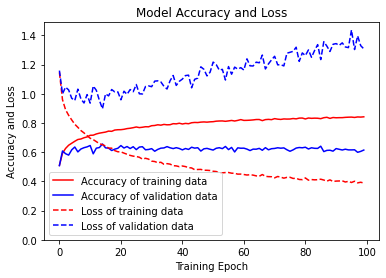

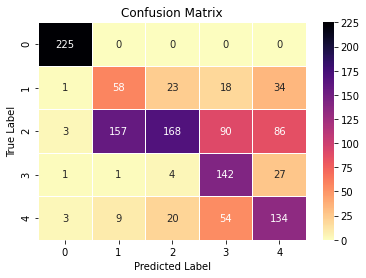

UNIQUE>>>>>>> ['xYdtS1F8tDyjEIgN', 'EUbKPOSQgjccjtvi', 'psiuhPJmLIa2wC4u', 'NKdnm6cN3KKAx7R4', 'MMuX9YIh4NTbLZLM', 'PE8D53oX060qLbdX']
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 9, 8)         656       
                                                                 
 average_pooling2d_4 (Averag  (None, 42, 3, 8)         0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_4 (Batc  (None, 42, 3, 8)         32        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 3, 32)         1056      
               

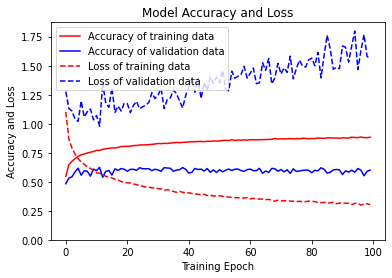

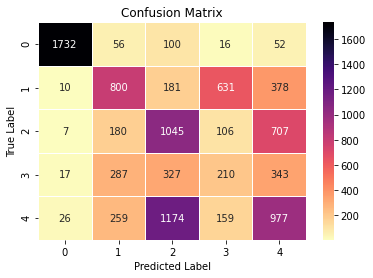

UNIQUE>>>>>>> ['NKdnm6cN3KKAx7R4', 'MMuX9YIh4NTbLZLM', 'PE8D53oX060qLbdX', 'xYdtS1F8tDyjEIgN', 'psiuhPJmLIa2wC4u', 'EUbKPOSQgjccjtvi']
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 9, 8)         656       
                                                                 
 average_pooling2d_6 (Averag  (None, 42, 3, 8)         0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_6 (Batc  (None, 42, 3, 8)         32        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 42, 3, 32)         1056      
               

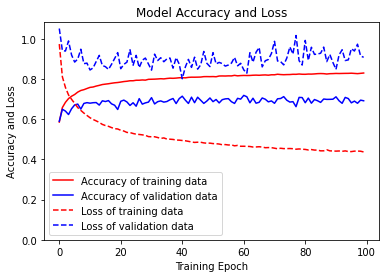

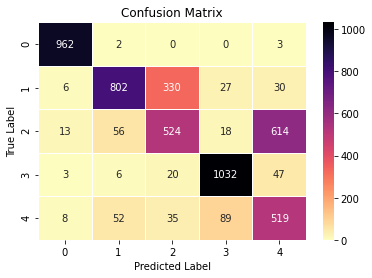

In [4]:
# overlapPercents = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
overlapPercents = [50, 60, 70, 90]
for OVERLAP_PERCENT in overlapPercents:
    _X, _y, _subjects = get_data_by_overlap_percent(OVERLAP_PERCENT)
    X, y, subjects = remove_invalid_data(_X, _y, _subjects)
    exclude_subjects = ['ddAeJA42PXvwthbW'];
    indexes = np.where(subjects == exclude_subjects)

    X = np.delete(X, indexes[0], axis=0)
    y = np.delete(y, indexes[0], axis=0)
    subjects = np.delete(subjects, indexes[0], axis=0)

    X_train, X_test, y_train, y_test, y_train_non_encoded, y_test_non_encoded = split_test_train_by_subjects(
        X, y, subjects, train_percent=0.9)
    gpus = tf.config.list_logical_devices('GPU')
    strategy = tf.distribute.MirroredStrategy(gpus)
    with strategy.scope():
        model, history, evaluation_history = train_model(X_train, y_train, X_test, y_test, overlap_percent=OVERLAP_PERCENT, batch_size=32, epochs=100, variant="cnn")
        save_history(history, OVERLAP_PERCENT)
        save_test_history(evaluation_history, OVERLAP_PERCENT)
        save_accuracy_loss_figure(history, OVERLAP_PERCENT)
        validations, predictions = compute_validations_predictions(
            model, X_test, y_test)
        save_confusion_matrix_figure(validations, predictions, OVERLAP_PERCENT, sns)